In [1]:
##  Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Install the ultralytics package using pip
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [3]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
train_annotations = '/content/gdrive/MyDrive/tomaset/toma/annotations/train.json'
val_annotations = '/content/gdrive/MyDrive/tomaset/toma/annotations/test.json'

train_images = '/content/gdrive/MyDrive/tomaset/toma/train'
val_images = '/content/gdrive/MyDrive/tomaset/toma/val'

In [6]:
import yaml

with open('/content/gdrive/MyDrive/tomaset/toma/ds_info.yaml', 'w') as f:
    file = {'names': ['b_fully_ripened', 'b_half_ripened', 'b_green', 'l_fully_ripened', 'l_half_ripened', 'l_green'],
            'nc': 6,
            'path': '/content/gdrive/MyDrive/tomaset/toma',
            'train': '/content/gdrive/MyDrive/tomaset/toma/train',
            'val': '/content/gdrive/MyDrive/tomaset/toma/val'
           }
    yaml.dump(file,f)

In [8]:
# #Instance
# model = YOLO('yolov8n.yaml')  # build a new model from YAML
# model = YOLO('yolov8n.pt')  # Transfer the weights from a pretrained model (recommended for training)

In [7]:
# n s m l x v8 models
# t s m c e v9 models
model_size = 'n'
pretrained = True

model = YOLO(f'yolov8{model_size}.pt') if pretrained else YOLO(f'yolov8{model_size}.yaml')

100%|██████████| 6.25M/6.25M [00:00<00:00, 300MB/s]


In [9]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/gdrive/MyDrive/tomaset/toma/ds_info.yaml

names:
- b_fully_ripened
- b_half_ripened
- b_green
- l_fully_ripened
- l_half_ripened
- l_green
nc: 6
path: /content/gdrive/MyDrive/tomaset/toma
train: /content/gdrive/MyDrive/tomaset/toma/train
val: /content/gdrive/MyDrive/tomaset/toma/val


In [10]:
# define number of classes based on YAML
import yaml
with open("/content/gdrive/MyDrive/tomaset/toma/ds_info.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [11]:
#Define a project --> Destination directory for all results
project = "/content/gdrive/MyDrive/tomaset/toma/results"
#Define subdirectory for this specific training
name = "Iteration" #note that if you run the training again, it creates a directory: 200_epochs-2

In [12]:
# # Train the model
# results = model.train(data='/kaggle/working/ds_info.yaml', epochs=30, imgsz=640,
#                       plots = True, val = True, visualize=True)

In [14]:
# Train the model
results = model.train(data='/content/gdrive/MyDrive/tomaset/toma/ds_info.yaml',
                      project=project,
                      name=name,
                      epochs=50,
                      #patience=4, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=640,
                      plots = True,
                      val = True,
                      visualize=True,
                      device = 0
                      )

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/tomaset/toma/ds_info.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/gdrive/MyDrive/tomaset/toma/results, name=Iteration, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

100%|██████████| 755k/755k [00:00<00:00, 131MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 271MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/tomaset/toma/train/labels... 643 images, 0 backgrounds, 0 corrupt: 100%|██████████| 643/643 [07:36<00:00,  1.41it/s]


train: New cache created: /content/gdrive/MyDrive/tomaset/toma/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/tomaset/toma/val/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [01:53<00:00,  1.42it/s]

val: New cache created: /content/gdrive/MyDrive/tomaset/toma/val/labels.cache


Plotting labels to /content/gdrive/MyDrive/tomaset/toma/results/Iteration/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/gdrive/MyDrive/tomaset/toma/results/Iteration
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      0.75G      1.105      2.875      1.122         74        640: 100%|██████████| 161/161 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.25it/s]

                   all        161       1996      0.333      0.449      0.295      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.832G     0.9859      1.809      1.047         21        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]

                   all        161       1996      0.386      0.541       0.41      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.775G     0.9224      1.593      1.022         19        640: 100%|██████████| 161/161 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.35it/s]


                   all        161       1996      0.525      0.605      0.545      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.732G     0.8937      1.458      1.007         48        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.35it/s]

                   all        161       1996      0.553      0.651      0.583      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.746G     0.8902      1.411      1.004         85        640: 100%|██████████| 161/161 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.30it/s]


                   all        161       1996       0.63      0.667      0.647      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      0.77G     0.8835      1.294     0.9873         60        640: 100%|██████████| 161/161 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.29it/s]


                   all        161       1996      0.629      0.678      0.663      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.703G     0.8422      1.216     0.9799         66        640: 100%|██████████| 161/161 [01:20<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.30it/s]

                   all        161       1996      0.629      0.641      0.655      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.771G     0.8107      1.197     0.9742         61        640: 100%|██████████| 161/161 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.33it/s]

                   all        161       1996      0.749      0.672      0.752      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.695G      0.806      1.153     0.9738         36        640: 100%|██████████| 161/161 [01:20<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.30it/s]

                   all        161       1996      0.641      0.697      0.711      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.855G     0.8059      1.143     0.9637         83        640: 100%|██████████| 161/161 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all        161       1996      0.718      0.705      0.748      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.826G     0.7887      1.067     0.9589        179        640: 100%|██████████| 161/161 [01:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]

                   all        161       1996      0.684      0.666      0.714      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.852G     0.7673      1.068     0.9515         14        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]

                   all        161       1996       0.72      0.737      0.783      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.795G     0.7771      1.035     0.9519         36        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]

                   all        161       1996      0.721       0.74      0.781      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.779G     0.7692     0.9442     0.9471         90        640: 100%|██████████| 161/161 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all        161       1996      0.677      0.716      0.746      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.852G     0.7708     0.9522     0.9439         35        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]

                   all        161       1996      0.756      0.724      0.799      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.789G     0.7581     0.9185     0.9399         23        640: 100%|██████████| 161/161 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]

                   all        161       1996      0.745      0.706      0.767      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.912G     0.7439      0.895     0.9389         30        640: 100%|██████████| 161/161 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]


                   all        161       1996      0.749      0.734      0.792      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.797G      0.737      0.894     0.9316         60        640: 100%|██████████| 161/161 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.40it/s]

                   all        161       1996      0.735      0.739      0.786      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.752G     0.7272     0.8607      0.935         86        640: 100%|██████████| 161/161 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.43it/s]

                   all        161       1996      0.741      0.755      0.799      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      0.74G     0.7245     0.8422      0.931        104        640: 100%|██████████| 161/161 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]

                   all        161       1996      0.784      0.726      0.811      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.805G     0.7268     0.8719     0.9324         44        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.40it/s]

                   all        161       1996      0.759      0.736      0.809      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      0.75G     0.7081     0.8229     0.9248        100        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all        161       1996      0.786      0.755      0.819      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.734G     0.7435     0.8507     0.9394         43        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]

                   all        161       1996      0.778      0.748       0.82      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.775G     0.7119     0.8159     0.9187         85        640: 100%|██████████| 161/161 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all        161       1996      0.786      0.715      0.805      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.732G     0.7022     0.7963     0.9178         32        640: 100%|██████████| 161/161 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]

                   all        161       1996      0.735      0.737       0.79      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.777G     0.6835     0.7991     0.9185         19        640: 100%|██████████| 161/161 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]

                   all        161       1996      0.776      0.727        0.8      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.785G      0.692     0.7596      0.916         38        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.40it/s]

                   all        161       1996      0.768      0.763      0.827      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.775G     0.6947     0.7452     0.9127         87        640: 100%|██████████| 161/161 [01:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]

                   all        161       1996      0.799      0.764      0.832       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.795G     0.6745     0.7186     0.9143         45        640: 100%|██████████| 161/161 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]

                   all        161       1996      0.786      0.751       0.83      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.766G     0.6907     0.7513     0.9199         71        640: 100%|██████████| 161/161 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]

                   all        161       1996      0.758      0.775      0.829      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.695G     0.6803     0.7188     0.9148         48        640: 100%|██████████| 161/161 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]

                   all        161       1996      0.805      0.718      0.822       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.832G      0.686     0.7353     0.9172         57        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.40it/s]

                   all        161       1996      0.751      0.761      0.815      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.768G     0.6767     0.7376     0.9093         54        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all        161       1996      0.767      0.782      0.833       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.832G     0.6673     0.7182     0.9092         33        640: 100%|██████████| 161/161 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]

                   all        161       1996      0.781      0.763       0.84      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.773G     0.6664     0.7077     0.9077         49        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.40it/s]

                   all        161       1996      0.826      0.738      0.846      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.873G     0.6618     0.6738     0.9045         67        640: 100%|██████████| 161/161 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]

                   all        161       1996       0.75      0.824      0.847      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.752G      0.666     0.6937     0.8997         32        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all        161       1996      0.773      0.782      0.841      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.783G     0.6617     0.6842      0.902         21        640: 100%|██████████| 161/161 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]

                   all        161       1996      0.733      0.803      0.826      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.771G     0.6557     0.6565     0.9007         55        640: 100%|██████████| 161/161 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]

                   all        161       1996      0.761      0.797      0.841      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      0.74G     0.6506     0.6603     0.9031         40        640: 100%|██████████| 161/161 [01:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.40it/s]


                   all        161       1996       0.81      0.742      0.832       0.69
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.701G     0.6191      0.669     0.8752         72        640: 100%|██████████| 161/161 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.30it/s]

                   all        161       1996      0.771      0.755      0.825      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.691G     0.6091     0.6417     0.8725        105        640: 100%|██████████| 161/161 [01:20<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.35it/s]

                   all        161       1996      0.802      0.719       0.82      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.664G     0.6057     0.6173     0.8693         20        640: 100%|██████████| 161/161 [01:19<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.30it/s]


                   all        161       1996      0.784      0.762      0.831      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.639G     0.6037     0.6209     0.8706         50        640: 100%|██████████| 161/161 [01:18<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.34it/s]

                   all        161       1996        0.8      0.765      0.837      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.738G     0.5897     0.6046     0.8694         10        640: 100%|██████████| 161/161 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]

                   all        161       1996      0.774      0.767      0.832      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.686G     0.5855     0.5876     0.8649         41        640: 100%|██████████| 161/161 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.40it/s]

                   all        161       1996      0.782      0.784      0.844      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.703G     0.5891     0.5827     0.8668         26        640: 100%|██████████| 161/161 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.40it/s]

                   all        161       1996      0.796      0.773      0.843      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      0.65G     0.5805     0.5651     0.8617         63        640: 100%|██████████| 161/161 [01:20<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all        161       1996      0.799      0.784      0.848      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.682G     0.5712     0.5578     0.8608         12        640: 100%|██████████| 161/161 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.40it/s]

                   all        161       1996      0.793      0.781      0.844      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.697G      0.581     0.5624     0.8575         22        640: 100%|██████████| 161/161 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]

                   all        161       1996      0.803      0.777      0.844      0.706



50 epochs completed in 1.362 hours.
Optimizer stripped from /content/gdrive/MyDrive/tomaset/toma/results/Iteration/weights/last.pt, 6.2MB
Optimizer stripped from /content/gdrive/MyDrive/tomaset/toma/results/Iteration/weights/best.pt, 6.2MB

Validating /content/gdrive/MyDrive/tomaset/toma/results/Iteration/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:17<00:00,  1.20it/s]


                   all        161       1996      0.798      0.784      0.847      0.712
       b_fully_ripened         40         72      0.719      0.748      0.796      0.702
        b_half_ripened         52        116      0.733      0.759      0.807      0.697
               b_green         71        387      0.881      0.879      0.935       0.78
       l_fully_ripened         59        269      0.811      0.827      0.877      0.742
        l_half_ripened         67        223      0.768       0.74      0.812       0.68
               l_green         69        929      0.874      0.755      0.857      0.672
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/gdrive/MyDrive/tomaset/toma/results/Iteration


In [15]:
from IPython.display import Image

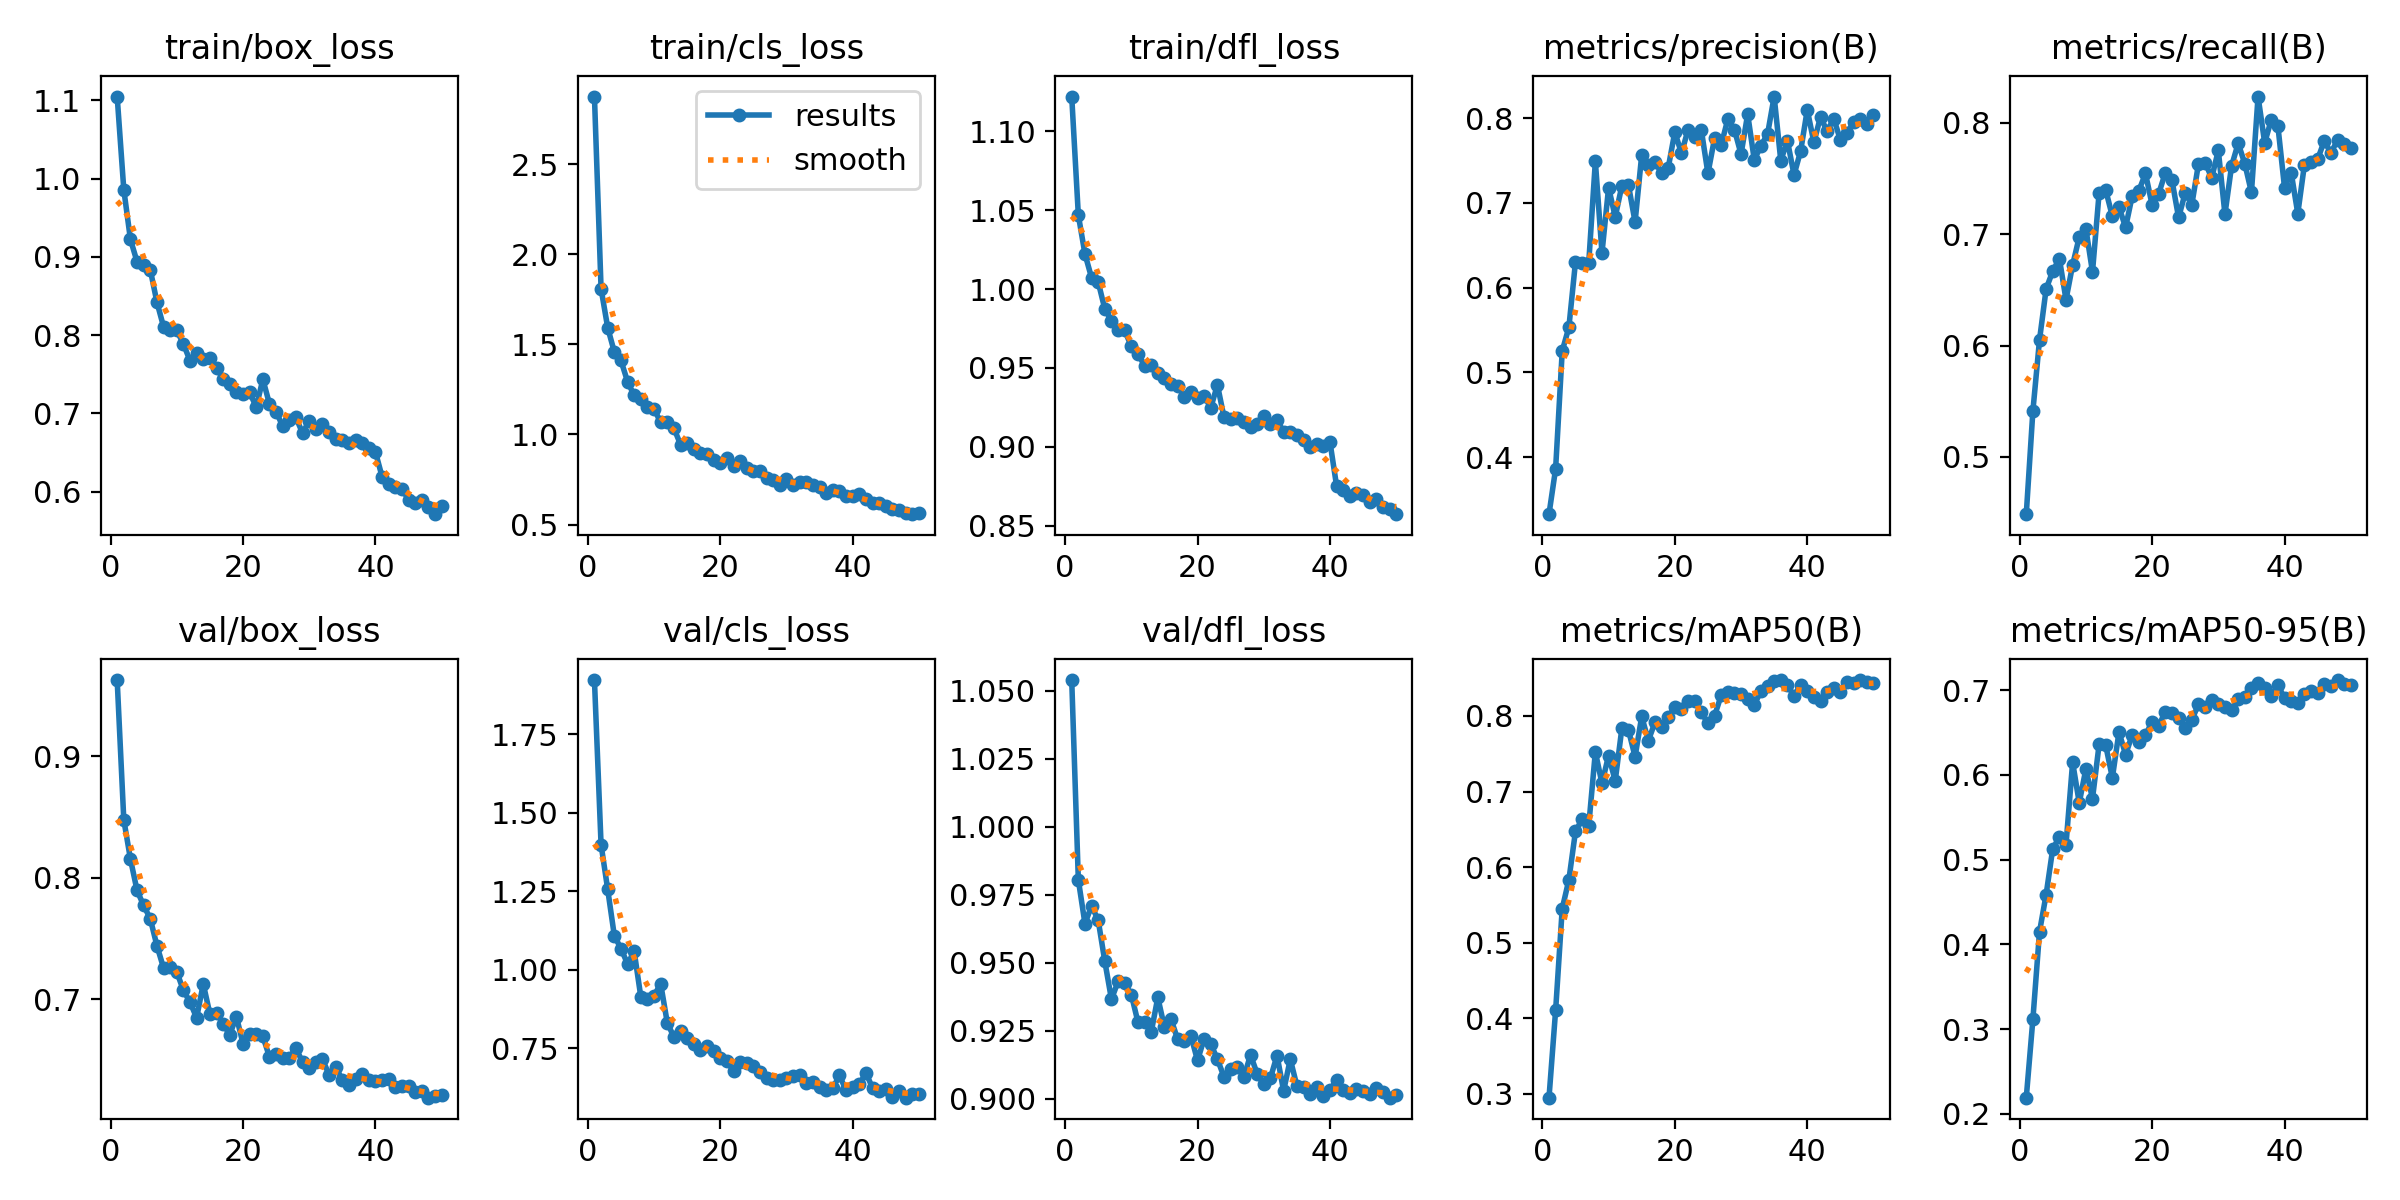

In [16]:
# Image(ROOT_DIR+"/results/10_epochs-/results.png")
Image("/content/gdrive/MyDrive/tomaset/toma/results/Iteration/results.png")

In [17]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
print(metrics)   # top1 accuracy

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/tomaset/toma/val/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]


                   all        161       1996      0.795      0.792      0.848      0.715
       b_fully_ripened         40         72      0.716       0.77      0.802      0.711
        b_half_ripened         52        116      0.734      0.767      0.807      0.701
               b_green         71        387       0.88      0.884      0.935      0.781
       l_fully_ripened         59        269      0.808      0.833      0.876      0.739
        l_half_ripened         67        223      0.759       0.74      0.813      0.684
               l_green         69        929      0.871      0.757      0.857      0.675
Speed: 0.8ms preprocess, 10.3ms inference, 0.1ms loss, 2.3ms postprocess per image
Results saved to /content/gdrive/MyDrive/tomaset/toma/results/Iteration2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0

In [ ]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
Image(filename='/content/gdrive/MyDrive/ObDet/augmented/results/25_epochs/train_batch1.jpg', width=900)

In [ ]:
#Without this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/gdrive/MyDrive/ObDet/augmented/results/25_epochs/weights

In [ ]:
my_new_model = YOLO('/content/gdrive/MyDrive/ObDet/augmented/results/25_epochs/weights/best.pt')

In [ ]:
new_image = '/content/gdrive/MyDrive/ObDet/data/test/images/bottle-66-_jpg.rf.4250f2574d0f1f62435211c18e2d6c1c.jpg'
new_results = my_new_model.predict(new_image, conf=0.5)  #Adjust conf threshold


In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_image = '/content/gdrive/MyDrive/ObDet/data/test/images/bottle-11-_jpg.rf.67dedf2db74393d2516182c6f8f63531.jpg'
new_results = my_new_model.predict(new_image, conf=0.6)  #Adjust conf threshold


In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_image = '/content/gdrive/MyDrive/ObDet/data/test/images/bottle-27-_jpg.rf.4a7103f759ea41150359145413d1617c.jpg'
new_results = my_new_model.predict(new_image, conf=0.6)  #Adjust conf threshold


In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_results = my_new_model.predict(source="http://192.168.1.9:8080/video", conf=0.3)  #Adjust conf threshold

In [ ]:
import cv2
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to access the webcam.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Run inference on the frame
    results = my_new_model.predict(frame)

    # Render the detection results on the frame
    annotated_frame = results[0].plot()  # Get the annotated frame from the first result

    # Display the annotated frame
    cv2.imshow("YOLO Detection", annotated_frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()